In [18]:
import pandas as pd
from sklearn.datasets import load_boston

dataset = load_boston()
variaveis = pd.DataFrame(dataset.data, columns=dataset.feature_names)
preco = pd.Series(dataset.target, name='MEDV')
df = pd.concat([variaveis, preco], axis=1)

In [19]:
#Com o comando .DESCR podemos ver a descrição das variáveis.
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<AxesSubplot:>

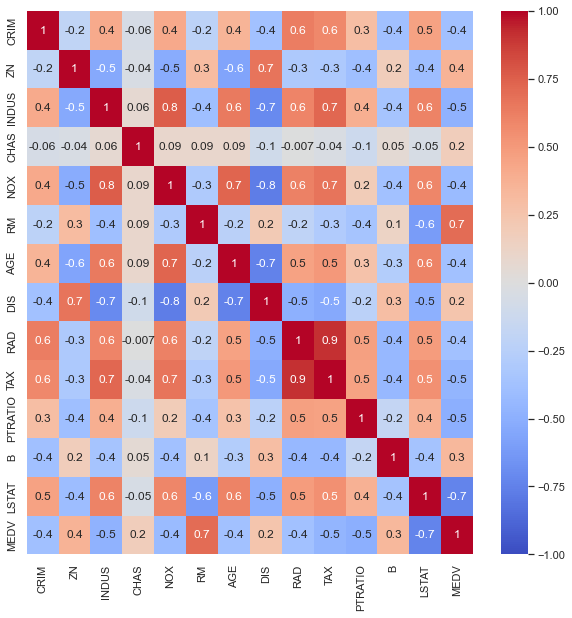

In [23]:
import seaborn as sns

sns.set(rc={'figure.figsize': (10, 10)})
sns.heatmap(df.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='coolwarm')

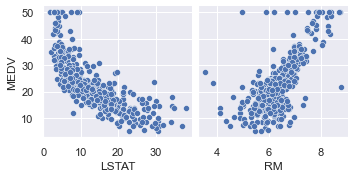

In [24]:
# ‘LSTAT’ e ‘RM’ mostraram uma alta correlação com ‘MEDV’ a variável alvo
sns.pairplot(y_vars='MEDV', x_vars=['LSTAT', 'RM'], data=df)

In [25]:
# Divisão do modelo em duas partes 20% teste e 80% treino
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(variaveis, preco, test_size=0.2, random_state=42)

In [26]:
import statsmodels.formula.api as sm

reg_linear1 = sm.ols(formula='MEDV~LSTAT', data=df.iloc[X_train.index,:]).fit()
reg_linear1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     476.3
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           3.20e-70
Time:                        20:53:52   Log-Likelihood:                -1317.2
No. Observations:                 404   AIC:                             2638.
Df Residuals:                     402   BIC:                             2646.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.8369      0.635     54.860      0.000      33.589      36.085
LSTAT         -0.9665      0.044    -21.825      0.000      -1.054      -0.879
==============================================================================
Omnibus:                       95.490   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.482
Skew:                           1.324   Prob(JB):                     7.85e-39
Kurtosis:                       4.846   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#Outra forma de regressão simples com a biblioteca do Scikit-Learn
from sklearn.linear_model import LinearRegression

rls = LinearRegression()
rls.fit(X_train[['LSTAT']], y_train)

LinearRegression()

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

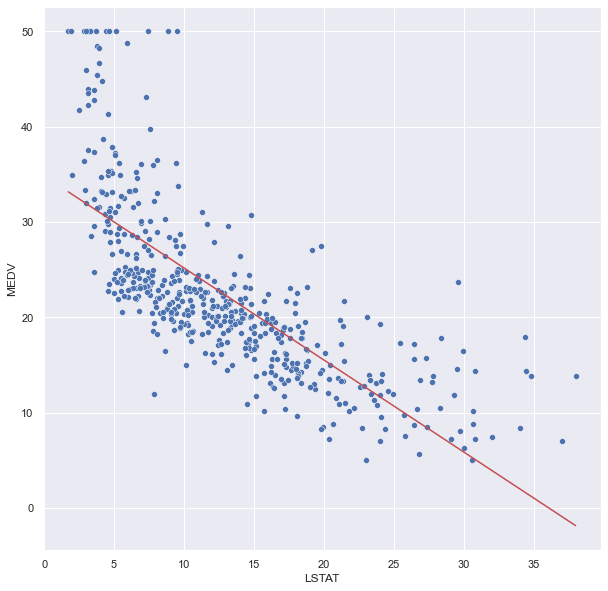

In [28]:
#Plot da regressão
sns.scatterplot(x=df['LSTAT'], y=df['MEDV'])
sns.lineplot(x=df['LSTAT'], y=[rls.coef_[0] * i + rls.intercept_ for i in df['LSTAT']], color='r')

Métricas

Conforme nós vamos criando e alterando diversos modelos precisamos poder compará-los para saber se estamos indo na direção correta.

RMSE: Root-mean-square-error ou a raiz do erro quadrático médio. É o desvio padrão dos resíduos que é a diferença do valor real para o valor predito

MAE: Mean Absolute Error ou o Erro médio absoluto. Parecido com RMSE, mas ao invés de elevar o resíduo o quadrado, soma-se o módulo.

R² e R²-ajustado: Já vimos que o R² diz o quanto nosso modelo explica a variação da nossa variável dependente. O R²-ajustado vai levar em conta também a quantidade de variáveis independentes que o modelo contém, então ele vai penalizar quando tiver variáveis que não contribuem para o modelo.

Voltando para a parte prática, vamos importar as funções que fazem o cálculo dessas métricas e criar uma função para passar esses parâmetros e já imprimir o resultado.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

def imprimir_metricas(model, X_train, X_test, y_train, y_test, name):
    train_pred = model.predict(X_train)
    rmse_train = mean_squared_error(y_train, train_pred)**0.5
    r2_train = r2_score(y_train, train_pred)

    test_pred = model.predict(X_test)
    rmse_test = mean_squared_error(y_test, test_pred)**0.5
    r2_test = r2_score(y_test, test_pred)

    print(f'''***{name}***
    treino
    RMSE: {round(rmse_train, 2)}
    R2: {round(r2_train, 2)}\n
    teste:
    RMSR: {round(rmse_test, 2)}
    R2: {round(r2_test, 2)}''')

In [29]:
imprimir_metricas(rls, X_train[['LSTAT']], X_test[['LSTAT']], y_train, y_test, 'Regressão Linear Simples')

***Regressão Linear Simples***
    treino
    RMSE: 6.31
    R2: 0.54

    teste:
    RMSR: 5.79
    R2: 0.54


#### Regressão Linear Múltipla

In [30]:
rlm = LinearRegression()
rlm.fit(X_train[['LSTAT', 'RM']], y_train)

imprimir_metricas(rls, X_train[['LSTAT', 'RM']], X_test[['LSTAT', 'RM']], y_train, y_test, 'Regressão Linear Simples')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)